# Transforms

Many of mathematicians' favorite tricks involve reexpressing a problem in a new way that makes it easier to solve. 

- Linear systems of equations? Invert the matrix.
- Constrained optimization problem? Use Lagrange multipliers to obtain an unconstrained problem (more or less).
- Hard-to-control thermodynamic variables (energy, number of particles, etc.)? Use the Legendre transform to express your system in controllable variables (temperature, chemical potential, etc.).
- [String theory on an anti-de Sitter space? Use the holographic principle to obtain a description in terms of a conformal quantum field theory on a boundary.](https://en.wikipedia.org/wiki/AdS/CFT_correspondence)
- Trying to prove something for a plane graph? Have you considered the dual graph?
 
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Duals_graphs.svg/580px-Duals_graphs.svg.png" style="width:100px;">
- [Or maybe you're trying to prove Fermat's last theorem, a problem in number theory, and you end up solving it geometry-land instead](https://en.wikipedia.org/wiki/Langlands_program).

When these transformations are their own inverses, we call the relationship a *duality*. Duality is so common, we might go so far as to call it a "theme" of mathematics, a unifying force that glues together mathematics' many seemingly disparate fields.

### Integral Transforms

One particularly powerful class of (not necessarily dual) transformations are [integral transforms](https://en.wikipedia.org/wiki/Integral_transform). These involve mapping a function to another function by some sort of integral. The most famous of these is the [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform), which maps a function of time to a function of frequency.

But there are [many others](https://en.wikipedia.org/wiki/Integral_transform#Table_of_transforms). 


### Fourier Transforms

The Fourier transform is a function that maps a function of time to a function of frequency. It's defined as follows:

$$
\mathcal{F}\left[f(t)\right](\omega) = \int_{-\infty}^{\infty} f(t) e^{-i 2 \pi \omega t} dt
$$

where $f$ is a function of time, $f(t)$, and $f$ is a function of frequency, $f(f)$. The integral is over all possible frequencies, $f$, and the function $f(t)$ is the function of time that we're trying to transform.

#### Example: Cosine Wave

Let's start with a simple example. Suppose we have a cosine wave, $f(t) = \cos(2 \pi t)$, and we want to transform it to a function of frequency. We can do this by plugging in the cosine into the Fourier transform:

$$
\mathcal{F}\left[\cos(2 \pi t)\right](\omega) = \int_{-\infty}^{\infty} \cos(2 \pi t) e^{-i 2 \pi \omega t} dt =  \sqrt{\frac{\pi}{2}}\delta(\omega-1) + \sqrt{\frac{\pi}{2}}\delta(\omega+1)$$

That is, in the frequency domain, our function is spiked (with a Dirac delta) at $\omega = \pm 1$. If you consider that $\cos x = \frac{e^{ix} + e^{-ix}}{2}$, this makes perfect sense.

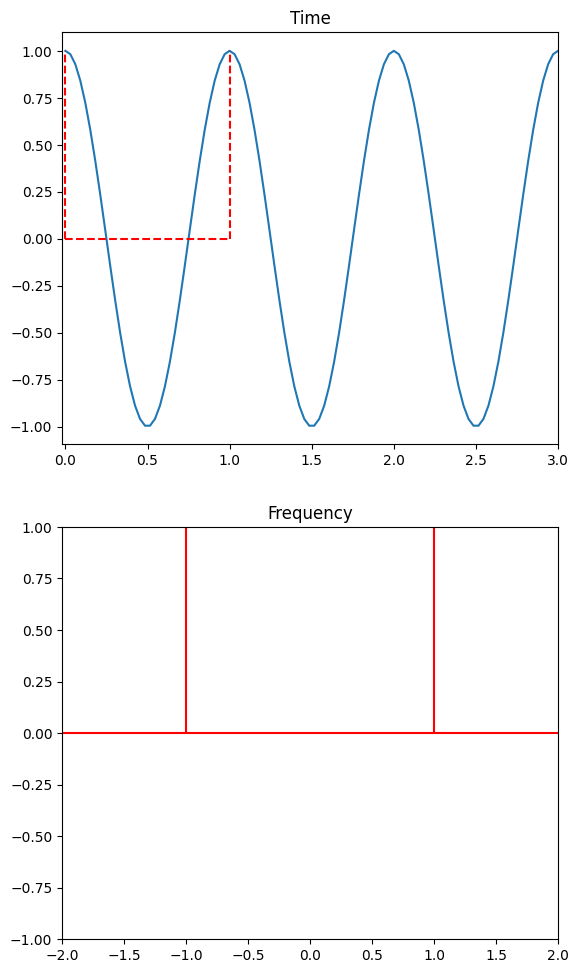

In [1]:
import numpy as np
from matplotlib import pyplot as plt

t = np.linspace(0, 3, 100)
x = np.cos((2 * np.pi) * t)

fig, axs = plt.subplots(2)

# Plot time domain
axs[0].set_title("Time")
axs[0].plot(t, x)
axs[0].hlines(y=[0], xmin=0, xmax=1, color="r", linestyles="dashed")
axs[0].vlines(x=[0., 1], ymin=0, ymax=1, color="r", linestyles="dashed")
axs[0].set_xlim(-0.02, 3)

# Plot frequency domain
axs[1].set_title("Frequency")
f = np.linspace(-2, 2, 100)
zeros = np.zeros_like(f)
axs[1].plot(f, zeros, color="r")
axs[1].vlines(x=[-1, 1], ymin=0, ymax=100, color="r")
axs[1].set_ylim(-1, 1)
axs[1].set_xlim(-2, 2)

plt.subplots_adjust(top=2)


#### Variants

##### Discrete

If your data is discrete in time (e.g., you're sampling a point every $\Delta t$ seconds), then the appropriate Fourier transform is the [discrete Fourier transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform). You need to compute a sum over timesteps, not an integral.

The result, will be discrete in frequency, because the relevant frequencies will be multiples of the minimum possible frequency $\Delta t^{-1}$. Any other frequencies will, when summed together, cancel out perfectly.

THe discrete Fourier transform is defined as follows:

$$
\mathcal{F}\left[f(t)\right](\omega) = \sum_{t=0}^{T-1} f(t) \omega^{\omega t},
$$

where $\omega_T = e^{-2 \pi i / T}$, the $T$-th root of unity.

As a matrix equation:

$$
\begin{pmatrix}
1 & 1 & 1 & \dots & 1 \\
1 & \omega_T & \omega_T^2 & \dots & \omega_T^{T-1} \\
1 & \omega_T^2 & \omega_T^4 & \dots & \omega_T^{2(T-1)} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & \omega_T^{T-1} & \omega_T^{2(T-1)} & \dots & \omega_T^{(T-1)(T-1)} \\
\end{pmatrix} 
\begin{pmatrix}
f(0) \\
f(1) \\
\vdots \\
f(T-1) \\
\end{pmatrix}
= \begin{pmatrix}
\mathcal{F}\left[f(t)\right](0) \\
\mathcal{F}\left[f(t)\right](\Delta t^{-1}) \\
\vdots \\
\mathcal{F}\left[f(t)\right](\frac{T-1}{T} \Delta t^{-1}) \\
\end{pmatrix}
$$


##### Bounded

TODO


If your data is continuous in time, then the appropriate Fourier transform is the [continuous Fourier transform](https://en.wikipedia.org/wiki/Continuous_Fourier_transform). 


A particularly powerful category of (non-necessarily dual) transformations involves converting a problem into an infinite sum of easy problems.

You may be familiar with [Taylor series](https://en.wikipedia.org/wiki/Taylor_series) (and Maclaurin series and [Laurent series](https://en.wikipedia.org/wiki/Laurent_series)). Taylor series let us locally approximate complicated functions with simple polynomials.

Today, we're going to look at a different technique under this banner: the [Fourier transform](https://en.wikipedia.org/wiki/Fourier_transform). The Fourier transform lets us globally approximate complicated functions with simple trigonometric ones.

# (Bonus) Perturbation theory

Perturbation theory involves transforming an infinitely hard problem into an infinite series of easy problems. It's an incredibly powerful collection of techniques, all the more so because it's totally lacking in mathematical rigor. This is the dark side of mathematics. It's what makes physicists more powerful than mathematicians. 

Perturbation theory involves three steps:
1. Take a hard problem and insert a small parameter $\epsilon$.
2. Expand the answer as a perturbation series in powers of $\epsilon$, and calculate the coefficients of each term.
3. Set $\epsilon=1$, and add up the series. 

Horribly intractable but continuous functions? Taylor series. 

### An example.

$$x^5 + x = 1$$

Thanks to the [Abel-Ruffini theorem](https://en.wikipedia.org/wiki/Abel%E2%80%93Ruffini_theorem), the quintic term makes this unsolvable.

Let's use perturbation theory. 

#### Step 1: Take a hard problem and insert a small parameter $\epsilon$.

First, where should we put $\epsilon$? Let's try the following: 

$$x^5 + \epsilon x = 1$$

The unperturbed problem ($x^5 = 1$) is solvable (it gives us the fifth roots of unity, $x = e^{n\pi/5}$)!

#### Step 2: Expand the answer as a perturbation series in powers of $\epsilon$, and calculate the coefficients of each term.

Next, we express our solution, $S$, in terms of a series in powers of $\epsilon$:

$$S = 1 + a\epsilon + b\epsilon^2 + c\epsilon^3 + \dots$$

Plug this solution into the original equation, expand the fifth power as a Taylor series, and we end up with:

$$\begin{align}
1 &+ 5a\epsilon + \epsilon^2 (5b + 10a^2) + \epsilon^3 (5c + 20ab) + \dots \\
   &+\epsilon + \epsilon^2a + \epsilon^3b + \dots = 1
\end{align}$$

Term-by-term the r.h.s. and l.h.s. have to agree because the Taylor series is unique. Matching terms, we get one equation for each order of $\epsilon$:

$$
\begin{align}
 \epsilon^0:& 1 &= 1 &\\
 \epsilon^1:& 5a + 1 &= 0  &\to a = -\frac{1}{5}\\
 \epsilon^2:& 5b + 10a^2 + a &= 0 &\to b = -\frac{1}{25}\\
\end{align}
$$

So the solution is something like this:

$$
S = 1 - \frac{1}{5}\epsilon - \frac{1}{25}\epsilon^2 - \frac{1}{125}\epsilon^3 + \dots
$$

The pattern in coefficients does not hold, but fortunately there is a formula, and we find that $\epsilon$ is within the radius of convergence.

The truly wonderful thing about perturbation theory is that convergence *does not matter*. The power comes from relaxing equality ($=$) to asymptotics ($\tilde$). In fact, *divergent answers "converge" to the right answer far faster than convergent answers*!

#### Step 3: Set $\epsilon=1$, and add up the series. 

Finally, we set $\epsilon=1$ and add up the series, 

From three terms, we get (for the real answer):
$$
S = 0.752
$$

Comparing to the exact answer ($S = 0.75487767\dots$), we see that we're off by about 0.4%.


ImportError: attempted relative import with no known parent package